# Pump Curves - Ulka E5 and Fluid-o-Tech 1106

The [Ulka E5](http://www.cemegroup.com/solenoid-pump/e5-60) and [Fluid-o-Tech 1106](http://www.fluidotech.it/Pages/solenoid-pump-mono.aspx) are solenoid pump (aka vibration pump) models commonly used in domestic espresso machines. A pump curve reflects the achievable discharge pressure at a given flowrate, which is limited by pump power and influenced by pump speed and efficiency.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

## Conversion Factors

In [31]:
mL_per_US_gallon = 3785.41
mL_per_L = 1000.0

sec_per_min = 60.0
sec_per_hr = 60.0 * sec_per_min

## Import the pump curve data

In [32]:
FluidOTech = pd.read_csv(r'https://github.com/DIYCoffeeGuy/data/raw/master/Fluidotech%201106%20Pump%20Curve.csv')
Ulka = pd.read_csv(r'https://github.com/DIYCoffeeGuy/data/raw/master/Ulka%20E5%20Pump%20Curve.csv')

In [33]:
FluidOTech['Volumetric Flowrate (mL/s)'] = FluidOTech['Volumetric Flowrate (L/h)'] * mL_per_L / sec_per_hr
Ulka['Volumetric Flowrate (mL/s)'] = Ulka['Volumetric Flowrate (mL / min)'] / sec_per_min

## Create the plot

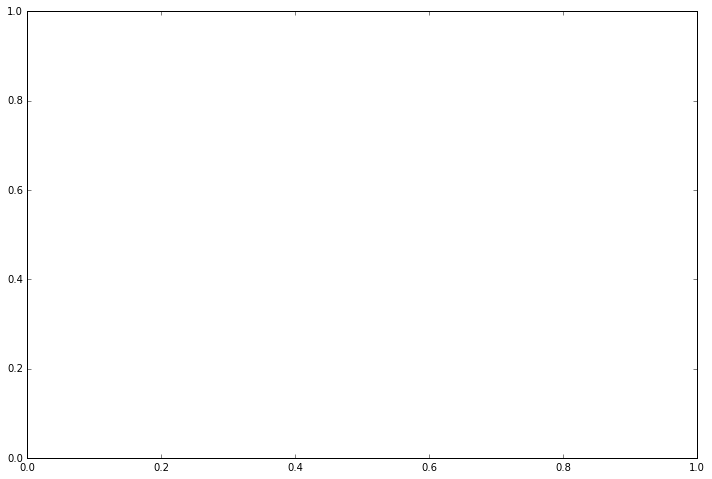

In [34]:
fig, axes = plt.subplots(figsize=(12,8))
#fig.canvas.draw();

### Add the pump curve data

In [35]:
FluidOTech.plot(
    kind='line',
    x='Discharge Pressure (barg)',
    y='Volumetric Flowrate (mL/s)',
    ax=axes,
    xlim=(0,15),
    legend=True,
    linestyle='dashed',
    color='b');

In [36]:
Ulka.plot(
    kind='line',
    ax=axes,
    x='Discharge Pressure (barg)',
    xlim=(0,15),
    y='Volumetric Flowrate (mL/s)',
    linestyle='solid',
    color='r');

### Configure the plot layout and labels

In [37]:
#Configure the legend
lines, labels = axes.get_legend_handles_labels()[0], ['Fluid-o-Tech 1106','Ulka E5']
axes.legend(lines, labels, loc='best');
axes.set_title('Comparison of Vibration Pump Curves', fontsize=20)

In [38]:
#Add ticks to the x-axes
axes.set_xticks(range(0,16));

In [39]:
#Configure LH y-axes
axes.set_yticks(range(0,13))
axes.set_ylabel('Volumetric Flowrate (mL/s)');

In [40]:
#Add and configure RH y-axis
axes2 = axes.twinx()
axes2.set_yticks([0.00,0.025,0.050,0.075,0.100,0.125,0.150,0.175,0.200,0.225,0.250])
axes2.set_ylim(0,60*15/mL_per_US_gallon)
axes2.set_ylabel('Volumetric Flowrate (US gal/min)');

### Display chart

In [41]:
fig.tight_layout()

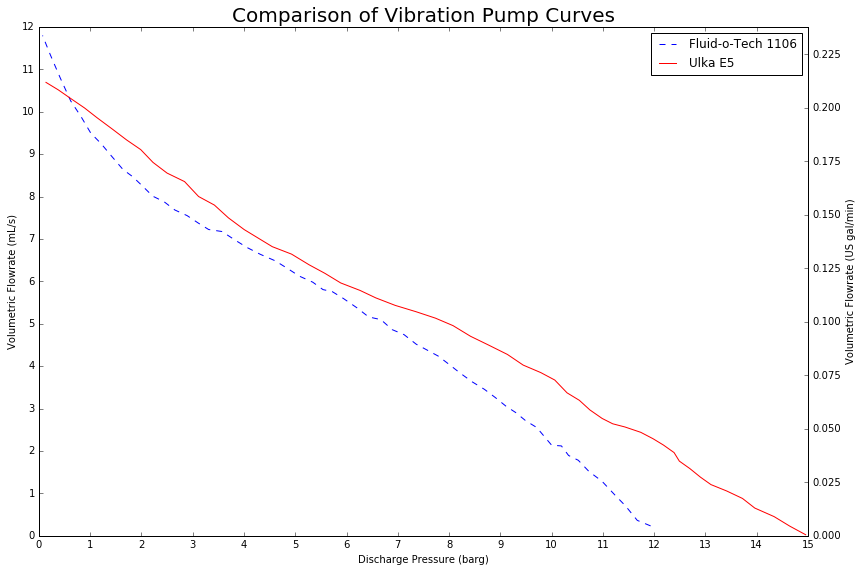

In [42]:
#Display figure
fig